<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [54]:
population = pd.read_csv('population.csv')

dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')


aide_alimentaire = pd.read_csv('aide_alimentaire.csv')


sous_nutrition =pd.read_csv('sous_nutrition.csv')


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [55]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [56]:
#consululter le nombre des colonne
#La nature des données dans chacune des colonnes
#Le nombre de vaConsulter le nombre de colonnesleurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [57]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [58]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population ['Valeur'] = population ['Valeur']*1000

In [59]:
#changement du nom de la colonne Valeur par Population
population.rename(columns = {'Valeur' : 'population'} ,inplace=True)


In [60]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [61]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [62]:
#Consulter le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [63]:
#affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [64]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0,inplace=True)



In [66]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
liste=['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure','Exportations - Quantité','Importations - Quantité','Nourriture','Pertes',
       'Production','Semences','Traitement','Variation de stock']
for element in liste:
    dispo_alimentaire[element]= dispo_alimentaire[element]*1000000

In [67]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,5.300000e+13,0.000000e+00,0.000000e+00,5.300000e+13,0.000000e+00,5.300000e+13,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+13,2.000000e+12,4.000000e+13,3.900000e+13,2.000000e+12,3.000000e+12,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+12,0.000000e+00,2.000000e+12,2.000000e+12,0.000000e+00,0.000000e+00,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,8.200000e+13,0.000000e+00,8.200000e+13,8.200000e+13,0.000000e+00,0.000000e+00,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [68]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [69]:
#Consulter le nombre de colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [70]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [71]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename( columns={'Pays bénéficiaire':'zone'} ,inplace = True)


In [72]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire ['Valeur'] = aide_alimentaire ['Valeur']*1000

In [73]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [74]:
#Afficher les dimensions du dataset

print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [75]:
#Consulter le nombre de colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [76]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()


,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [77]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'],errors='coerce')



In [78]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   object 
 2   Valeur  504 non-null    float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB


In [79]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition.fillna(0,inplace=True)


In [80]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename( columns = {'Valeur':'sous_nutrition'} , inplace= True)

In [81]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition ['sous_nutrition'] = sous_nutrition ['sous_nutrition']* 1000000

In [82]:
#Afficher les 5 premières lignes de
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

In [85]:
population2017 = population.loc[population['Année']==2017,['Zone','population']]
sous_nutrition2017 = sous_nutrition.loc[sous_nutrition['Année']=='2016-2018' ,['Zone','sous_nutrition']]
Data = pd.merge(population2017,sous_nutrition2017, on ='Zone')

In [86]:
#Affichage du dataset
Data.head()

,Zone,population,sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [88]:
#Calcul et affichage du pourcentage de personnes en état de sous nutrition
pourcentage_personnes_sous_nutrition=Data['sous_nutrition'].sum()/Data['population'].sum()*100
print(pourcentage_personnes_sous_nutrition)

7.1011968332354165


In [89]:
#Nombre de personnes en état de sous nutrition
Data['population'].sum()

7543798779.0

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [90]:
#Combien mange en moyenne un être humain ? Source => 
print('un être humain mange 2000 kcal')

un être humain mange 2000 kcal


In [91]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
data_population2017_dispo_alimentaire = pd.merge(population2017,dispo_alimentaire,on= 'Zone')

In [92]:
#Affichage du nouveau dataframe
data_population2017_dispo_alimentaire.head()

,Zone,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,36296113.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,5.300000e+13,0.000000e+00,0.000000e+00,5.300000e+13,0.000000e+00,5.300000e+13,0.0,0.0,0.0
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+13,2.000000e+12,4.000000e+13,3.900000e+13,2.000000e+12,3.000000e+12,0.0,0.0,0.0
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+12,0.000000e+00,2.000000e+12,2.000000e+12,0.000000e+00,0.000000e+00,0.0,0.0,0.0
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,8.200000e+13,0.000000e+00,8.200000e+13,8.200000e+13,0.000000e+00,0.000000e+00,0.0,0.0,0.0


In [93]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
data_population2017_dispo_alimentaire['dispo_kcal']=
data_population2017_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']
*data_population2017_dispo_alimentaire['population']*365



In [94]:
#Calcul du nombre d'humains pouvant être nourris
nombre_humains=data_population2017_dispo_alimentaire['dispo_kcal'].sum()/(2000*365)
print(nombre_humains)

10459492313.6655


In [145]:
poucentage_humains=nombre_humains/population2017['population'].sum()*100
print(poucentage_humains)

138.57056803512194


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [96]:
#Transfert des données avec les végétaux dans un nouveau dataframe
data_vegeteaux=data_population2017_dispo_alimentaire.loc[data_population2017_dispo_alimentaire['Origine']== 'vegetale',:]
data_vegeteaux.head()

,Zone,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,4.100000e+13,2.000000e+12,4.000000e+13,3.900000e+13,2.000000e+12,3.000000e+12,0.0,0.0,0.0,1.324808e+10
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.000000e+12,0.000000e+00,2.000000e+12,2.000000e+12,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.324808e+10
3,Afghanistan,36296113.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,8.200000e+13,0.000000e+00,8.200000e+13,8.200000e+13,0.000000e+00,0.000000e+00,0.0,0.0,0.0,5.299232e+10
6,Afghanistan,36296113.0,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3.000000e+12,0.000000e+00,3.000000e+12,3.000000e+12,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00


In [97]:
#Calcul du nombre de kcal disponible pour les végétaux
nombre_kcal_vegeteaux=data_vegeteaux['dispo_kcal'].sum()
print(nombre_kcal_vegeteaux)

6300178937197865.0


In [98]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nombre_humains_nourris_végéteaux=nombre_kcal_vegeteaux/(2000*365)
print(nombre_humains_nourris_végéteaux)

8630382105.7505


In [170]:
#pourcentage d'humains pouvant être nourris avec les végétaux
nombre_humains_nourris_végéteaux/population2017['population'].sum()*100

114.33795397425868

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [99]:
#Calcul de la disponibilité totale
disponibilite_total=dispo_alimentaire['Disponibilité intérieure'].sum()
print(disponibilite_total)

9.848994e+18


In [100]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures,Semences,Traitement,Autres utilisations 
liste=['Aliments pour animaux','Pertes','Nourriture','Semences','Traitement','Autres Utilisations']
for elt in liste:   
 print(elt,dispo_alimentaire[elt].sum()*100/disponibilite_total)

Aliments pour animaux 13.242418464261426
Pertes 4.606541541196999
Nourriture 49.51021393657057
Semences 1.5705258831511117
Traitement 22.384895350733284
Autres Utilisations 8.782856401374596


Text(0.5, 1.0, 'Répartition de la disponibilité interieure')

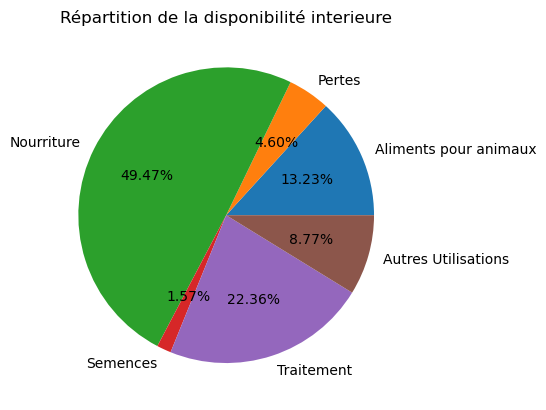

In [169]:
labels='Aliments pour animaux','Pertes','Nourriture','Semences','Traitement','Autres Utilisations'
sizes=[13.24,4.60,49.51,1.57,22.38,8.78]
fig,ax=plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.2f%%')
plt.title('Répartition de la disponibilité interieure')

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [101]:
#Création d'une liste avec toutes les variables

liste=['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales','Autres']

In [103]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
data_cereales=dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(liste),:]
data_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.000000e+00,0.0,1369.0,160.23,4.69,36.91,5.992000e+15,0.0,1.173000e+15,4.895000e+15,7.750000e+14,5.169000e+15,3.220000e+14,0.0,-3.500000e+14
32,Afghanistan,Maïs,vegetale,2.000000e+14,0.0,21.0,2.50,0.30,0.56,3.130000e+14,0.0,1.000000e+12,7.600000e+13,3.100000e+13,3.120000e+14,5.000000e+12,0.0,0.000000e+00
34,Afghanistan,Millet,vegetale,0.000000e+00,0.0,3.0,0.40,0.02,0.08,1.300000e+13,0.0,0.000000e+00,1.200000e+13,1.000000e+12,1.300000e+13,0.000000e+00,0.0,0.000000e+00
40,Afghanistan,Orge,vegetale,3.600000e+14,0.0,26.0,2.92,0.24,0.79,5.240000e+14,0.0,1.000000e+13,8.900000e+13,5.200000e+13,5.140000e+14,2.200000e+13,0.0,0.000000e+00
47,Afghanistan,Riz (Eq Blanchi),vegetale,0.000000e+00,0.0,141.0,13.82,0.27,2.70,4.610000e+14,0.0,1.190000e+14,4.220000e+14,2.400000e+13,3.420000e+14,1.400000e+13,0.0,0.000000e+00


In [104]:
#Affichage de la proportion d'alimentation animale 
proportion_alimentation_animale=(data_cereales['Aliments pour animaux'].sum()/data_cereales['Disponibilité intérieure'].sum())*100
print(proportion_alimentation_animale)

35.91069436868201


In [105]:
#Affichage de la proportion d'alimentation humaine
proportion_alimentation_humaine=(data_cereales['Nourriture'].sum()/data_cereales['Disponibilité intérieure'].sum())*100
print(proportion_alimentation_humaine)

43.02080172673916


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [106]:
#Création de la colonne proportion par pays
Data['proportion par pays']=Data['sous_nutrition']/Data['population']*100


In [107]:
#affichage après trie des 10 pires pays
Data_sorted=Data.sort_values('proportion par pays',ascending=False).head(10)
Data_sorted.head(10)

,Zone,population,sous_nutrition,proportion par pays
78,Haïti,10982366.0,5300000.0,48.259182
157,République populaire démocratique de Corée,25429825.0,12000000.0,47.188685
108,Madagascar,25570512.0,10500000.0,41.062924
103,Libéria,4702226.0,1800000.0,38.279742
100,Lesotho,2091534.0,800000.0,38.249438
183,Tchad,15016753.0,5700000.0,37.957606
161,Rwanda,11980961.0,4200000.0,35.055619
121,Mozambique,28649018.0,9400000.0,32.810898
186,Timor-Leste,1243258.0,400000.0,32.173531
0,Afghanistan,36296113.0,10500000.0,28.928718


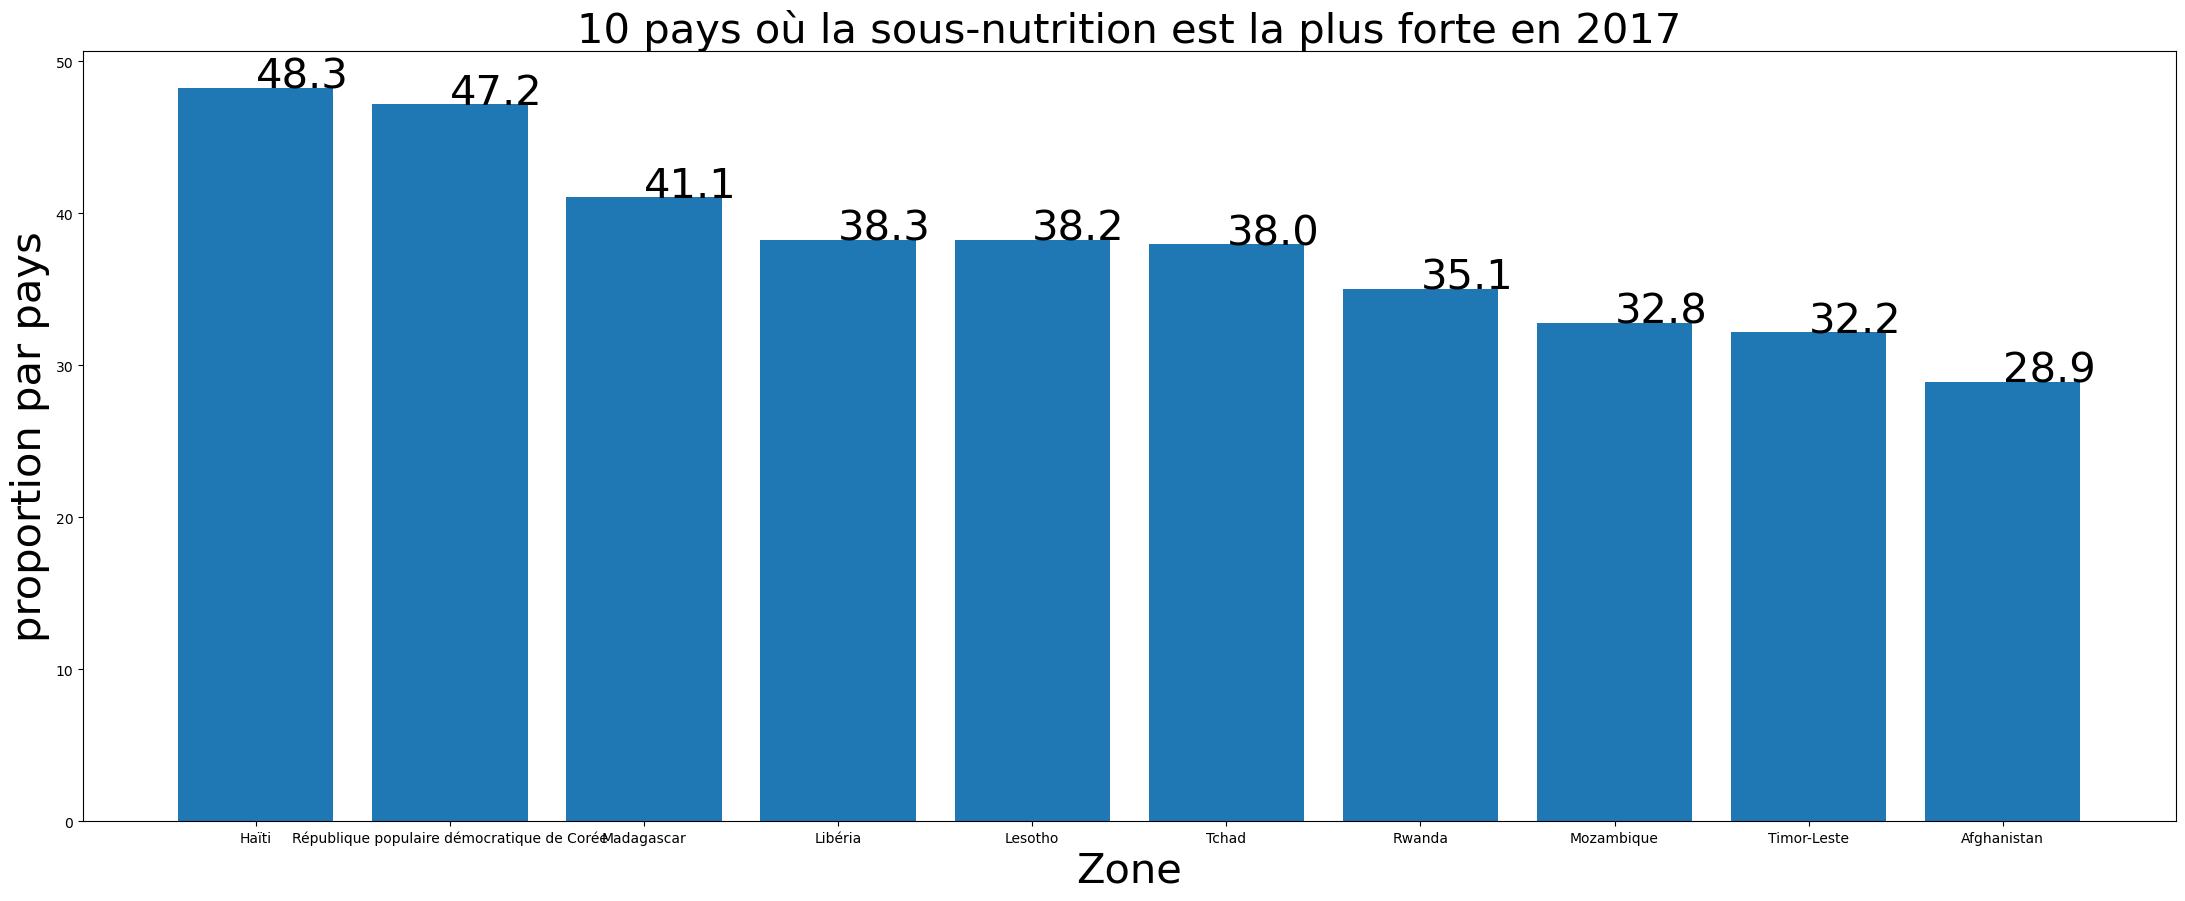

In [198]:
#graphique proportion par pays (10 pires pays)
plt.figure(figsize=(27,10))
plt.bar(height=Data_sorted['proportion par pays'],x=Data_sorted['Zone'])
plt.title('10 pays où la sous-nutrition est la plus forte en 2017',fontsize=30)
plt.xlabel('Zone',fontsize=30)
plt.ylabel('proportion par pays',fontsize=30)
proportion=Data_sorted['proportion par pays'].tolist()
for i in range(10):
    plt.text(i,proportion[i],round(proportion[i],1),fontsize=30)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [109]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire.groupby('zone')['Valeur'].sum()

zone
Afghanistan     185452000
Algérie          81114000
Angola            5014000
Bangladesh      348188000
Bhoutan           2666000
                  ...    
Zambie            3026000
Zimbabwe         62570000
Égypte            1122000
Équateur          1362000
Éthiopie       1381294000
Name: Valeur, Length: 76, dtype: int64

In [110]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
pays_plus_aide_alimentaire=aide_alimentaire.groupby('zone')['Valeur'].sum().sort_values(ascending=False).head(10)
pays_plus_aide_alimentaire.head(10)

zone
République arabe syrienne           1858943000
Éthiopie                            1381294000
Yémen                               1206484000
Soudan du Sud                        695248000
Soudan                               669784000
Kenya                                552836000
Bangladesh                           348188000
Somalie                              292678000
République démocratique du Congo     288502000
Niger                                276344000
Name: Valeur, dtype: int64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [111]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
data_2013_2016 = aide_alimentaire[['zone','Année','Valeur']].groupby(['zone','Année']).sum().reset_index()


In [112]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
liste_data_2013_2016=['République arabe syrienne','Soudan','Éthiopie','Yémen','Soudan du Sud']


In [113]:
#On filtre sur le dataframe avec notre liste
data5pays=data_2013_2016.loc[data_2013_2016['zone'].isin(liste_data_2013_2016),:]

In [114]:
# Affichage des pays avec l'aide alimentaire par année
data5pays

,zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


([<matplotlib.axis.XTick at 0x1f9e1345270>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016')])

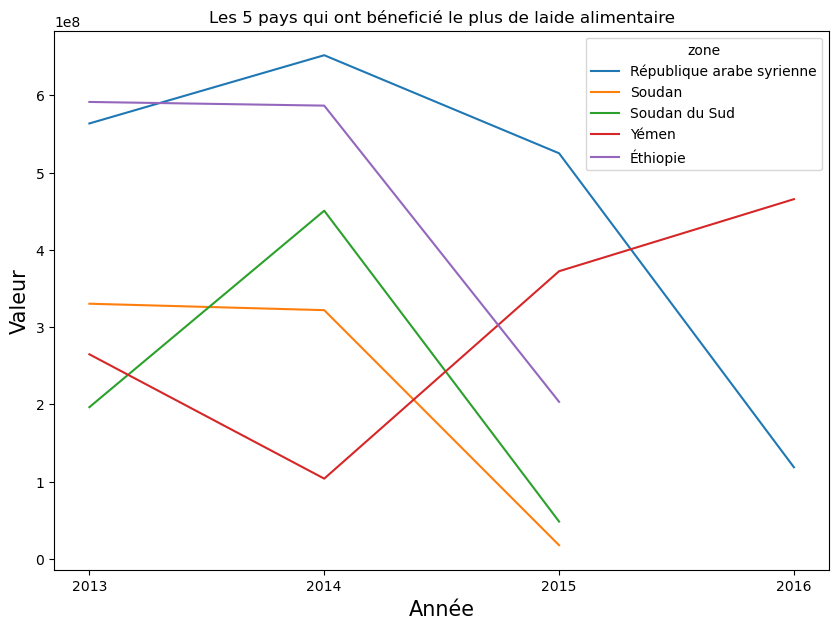

In [165]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data5pays,x='Année',y='Valeur',hue='zone')
plt.title('Les 5 pays qui ont béneficié le plus de laide alimentaire')
plt.xlabel('Année',fontsize=15)
plt.ylabel('Valeur',fontsize=15)
plt.xticks([2013,2014,2015,2016])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [115]:
#Calcul de la disponibilité en kcal par personne par jour par pays
data_population2017_dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()


Zone
Afghanistan              2087.0
Afrique du Sud           3020.0
Albanie                  3188.0
Algérie                  3293.0
Allemagne                3503.0
                          ...  
Émirats arabes unis      3275.0
Équateur                 2346.0
États-Unis d'Amérique    3682.0
Éthiopie                 2129.0
Îles Salomon             2383.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 172, dtype: float64

In [116]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
data_population2017_dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values().head(10)

Zone
République centrafricaine                     1879.0
Zambie                                        1924.0
Madagascar                                    2056.0
Afghanistan                                   2087.0
Haïti                                         2089.0
République populaire démocratique de Corée    2093.0
Tchad                                         2109.0
Zimbabwe                                      2113.0
Ouganda                                       2126.0
Timor-Leste                                   2129.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [117]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
data_population2017_dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=False).head(10)


Zone
Autriche                 3770.0
Belgique                 3737.0
Turquie                  3708.0
États-Unis d'Amérique    3682.0
Israël                   3610.0
Irlande                  3602.0
Italie                   3578.0
Luxembourg               3540.0
Égypte                   3518.0
Allemagne                3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [119]:
#création d'un dataframe avec uniquement la Thaïlande 
Data_Thaïlande=data_population2017_dispo_alimentaire.loc[data_population2017_dispo_alimentaire['Zone']=='Thaïlande',:]
Data_Thaïlande.head()

,Zone,population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,dispo_kcal
14116,Thaïlande,69209810.0,Abats Comestible,animale,0.0,0.000000e+00,3.0,1.11,0.09,0.56,7.400000e+13,5.000000e+12,3.300000e+13,7.500000e+13,0.000000e+00,4.500000e+13,0.0,0.000000e+00,0.000000e+00,7.578474e+10
14117,Thaïlande,69209810.0,"Agrumes, Autres",vegetale,0.0,0.000000e+00,0.0,0.09,0.00,0.00,8.000000e+12,6.000000e+12,2.000000e+12,6.000000e+12,0.000000e+00,1.200000e+13,0.0,2.000000e+12,0.000000e+00,0.000000e+00
14118,Thaïlande,69209810.0,"Alcool, non Comestible",vegetale,0.0,3.580000e+14,0.0,0.00,0.00,0.00,3.580000e+14,1.100000e+14,2.100000e+13,0.000000e+00,0.000000e+00,4.470000e+14,0.0,0.000000e+00,0.000000e+00,0.000000e+00
14119,Thaïlande,69209810.0,Aliments pour enfants,vegetale,0.0,0.000000e+00,2.0,0.18,0.01,0.08,1.200000e+13,7.000000e+12,1.900000e+13,1.200000e+13,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.052316e+10
14120,Thaïlande,69209810.0,Ananas,vegetale,0.0,0.000000e+00,10.0,10.02,0.04,0.08,7.820000e+14,1.449000e+15,9.000000e+12,6.710000e+14,1.100000e+14,2.209000e+15,0.0,0.000000e+00,1.300000e+13,2.526158e+11


In [120]:
#Calcul de la sous nutrition en Thaïlande
Data.loc[Data['Zone']=='Thaïlande','proportion par pays']
    

185    8.958268
Name: proportion par pays, dtype: float64

In [122]:
# On calcule la proportion exportée en fonction de la proportion
data_manioc=Data_Thaïlande.loc[Data_Thaïlande['Produit']=='Manioc',:]
proportion_manioc=data_manioc['Exportations - Quantité'].sum()/data_manioc['Production'].sum()*100
print(proportion_manioc)

83.41272991928014


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [123]:
#nombre de personnes en sous nutrition en Thaïlande
Data.loc[Data['Zone']=='Thaïlande','sous_nutrition']
    

185    6200000.0
Name: sous_nutrition, dtype: float64

In [146]:
#disponibilté alimentaire par personne en Thaïlande
Data_Thaïlande.loc[:,'Disponibilité alimentaire (Kcal/personne/jour)'].sum()

2785.0

In [182]:
#disponibilité moyenne mondiale
data_population2017_dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().mean()

2841.639534883721